## Imports

In [1]:
from JSU_lib import *

## Utils functions

## Concatenating P2RANK predictions for LIGYSIS representative chains

In [2]:
rep_chains_files = read_from_pickle("./results/PDB_rep_chains_files.pkl")

LIGYSIS_rep_chains = [el.split(".")[0] for el in rep_chains_files]

preds_dir = "/Users/2394007/Documents/PHD/LOCAL/JSU_site_predictors/PROGRAMS/p2rank_2.4.2-beta.1/test_output/predict_trans_rep_chains_V2_CONS"
all_rep_chains_LIGYSIS = [el.split(".")[0] for el in os.listdir(preds_dir) if el.endswith("_predictions.csv")]

In [19]:
all_rep_chains_LIGYSIS = [el for el in all_rep_chains_LIGYSIS if el in LIGYSIS_rep_chains]

In [10]:
len(LIGYSIS_rep_chains)

4037

In [21]:
len(set(all_rep_chains_LIGYSIS))

4037

In [22]:
t0 = time.time()

pred_dfs = []
ress_dfs = []

no_preds = []
no_ress = []

for i, rep_chain in enumerate(all_rep_chains_LIGYSIS):
    
    if i % 100 == 0:
        print(i)
        
    preds_path = os.path.join(preds_dir, f'{rep_chain}.trans.pdb_predictions.csv')
    ress_path = os.path.join(preds_dir, f'{rep_chain}.trans.pdb_residues.csv')
    try:
        preds_df = pd.read_csv(preds_path)
        preds_df["rep_chain"] = rep_chain
        pred_dfs.append(preds_df)
    except:
        print("Predictions not found for {}".format(rep_chain))
        no_preds.append(rep_chain)   
    try:
        ress_df = pd.read_csv(ress_path)
        ress_df["rep_chain"] = rep_chain
        ress_dfs.append(ress_df)
    except:
        print("Residues not found for {}".format(rep_chain))
        no_ress.append(rep_chain)
        
all_p2rank_preds = pd.concat(pred_dfs).reset_index(drop = True)
all_p2rank_ress = pd.concat(ress_dfs).reset_index(drop = True)

tf = time.time()
print(tf-t0)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
35.74350905418396


In [23]:
print(len(no_preds))
print(len(no_ress))

0
0


In [24]:
print(len(pred_dfs)) #4037
print(len(ress_dfs))  #4037
p2rank_pred_reps = all_p2rank_preds.query('rep_chain in @LIGYSIS_rep_chains').rep_chain.unique()
print(len(all_p2rank_ress.query('rep_chain in @LIGYSIS_rep_chains').rep_chain.unique())) #4037
print(len(p2rank_pred_reps)) # P2Rank does not predict any sites in 288 proteins (7.13%) #3193

4037
4037
4037
3749


In [8]:
LIGYSIS_reps = read_from_pickle("./results/LIGYSIS_3448_chains.pkl")
len(set(LIGYSIS_reps).intersection(set(p2rank_pred_reps)))

3193

In [14]:
(4037-3749)/4037

0.07134010403765172

In [25]:
all_p2rank_preds.shape

(14225, 12)

In [26]:
all_p2rank_ress.shape

(1147073, 8)

In [17]:
all_p2rank_preds.head(3)

,name,rank,score,probability,sas_points,surf_atoms,center_x,center_y,center_z,residue_ids,surf_atom_ids,rep_chain
0,pocket1,1,2.90,0.093,32,23,5.4987,-6.5148,4.5887,C_106 C_110 C_139 C_140 C_142 C_171 C_174 C_2...,266 267 392 403 407 409 612 644 858 862 870 8...,2b0o_G
1,pocket1,1,24.38,0.879,116,50,-6.8088,7.4438,0.1750,A_102 A_108 A_127 A_128 A_178 A_179 A_27 A_29...,218 219 221 223 237 363 373 377 379 380 411 4...,5qhh_A
2,pocket1,1,1.92,0.038,32,18,-11.3402,11.2421,3.9851,A_103 A_12 A_15 A_16 A_8 A_95 A_96 A_98,21 22 45 46 54 76 90 694 705 723 724 760 761 ...,6yih_A


In [27]:
i_cols = ["rep_chain", "name", "rank", "score", "probability", "sas_points", "surf_atoms", "residue_ids", "center_x", "center_y", "center_z"]

p2rank_pockets_df = fix_col_names(all_p2rank_preds)
p2rank_pockets_df = reformat_sites_df(p2rank_pockets_df[i_cols])

In [28]:
p2rank_pockets_df.head(3)

,rep_chain,ID,RANK,score,prob,n_sas_points,n_surf_atoms,aas,centre,n_aas
0,6yih_A,1,1,1.92,0.038,32,18,"[103, 12, 15, 16, 8, 95, 96, 98]","(-11.3402, 11.2421, 3.9851)",8
1,4gnk_D,1,1,6.82,0.382,65,38,"[313, 318, 328, 663, 666, 690, 693, 694, 700, ...","(-11.3104, -0.06, -0.2259)",17
2,4gnk_D,2,2,4.46,0.202,64,35,"[150, 151, 154, 215, 218, 219, 222, 224, 227, ...","(11.0049, -21.288, 3.3336)",15


In [19]:
#p2rank_pockets_df.to_pickle("./results/P2RANK_sites_V2.pkl")
#p2rank_pockets_df.to_pickle("./results/P2RANK_ress_V2.pkl")

## Calcualte RoG of P2RANK pockets

In [29]:
target_dir = './../DATA/trans_rep_chains'

In [30]:
rep_chains_sites = p2rank_pockets_df.rep_chain.unique().tolist()

In [31]:
len(rep_chains_sites) # all rep chains with P2Rank predictions

3749

In [32]:
p2rank_pockets_df.head(3)

,rep_chain,ID,RANK,score,prob,n_sas_points,n_surf_atoms,aas,centre,n_aas
0,6yih_A,1,1,1.92,0.038,32,18,"[103, 12, 15, 16, 8, 95, 96, 98]","(-11.3402, 11.2421, 3.9851)",8
1,4gnk_D,1,1,6.82,0.382,65,38,"[313, 318, 328, 663, 666, 690, 693, 694, 700, ...","(-11.3104, -0.06, -0.2259)",17
2,4gnk_D,2,2,4.46,0.202,64,35,"[150, 151, 154, 215, 218, 219, 222, 224, 227, ...","(11.0049, -21.288, 3.3336)",15


In [33]:
len(p2rank_pockets_df)

14225

In [34]:
cc = [
    'label_seq_id_full', 'label_comp_id', 'type_symbol',
    'label_atom_id', 'Cartn_x', 'Cartn_y', 'Cartn_z'
]

## Using transformed structures to calculate RoG and centroid derived from residues

In [35]:
T0 = time.time()
RoG_dict = {}
centres_dict_ress = {}
errors = []
for i, rep_chain in enumerate(rep_chains_sites):
    if i % 100 == 0:
        print(i)
    pdb_path = os.path.join(target_dir, f'{rep_chain}.trans.pdb')
    df = PDBXreader(inputfile=pdb_path).atoms(format_type="pdb", excluded=())[cc].query('label_atom_id == "CA"').reset_index(drop = True)
    rep_chain_df = p2rank_pockets_df.query('rep_chain == @rep_chain')
    for _, row in rep_chain_df.iterrows():
        site_ress = row.aas
        ress_CAs = df.query('label_seq_id_full in @site_ress')
        CAs_coords = np.array(list((zip(ress_CAs.Cartn_x, ress_CAs.Cartn_y, ress_CAs.Cartn_z))))
        try:
            center_of_mass = np.mean(CAs_coords, axis=0)
            distances_squared = np.sum((CAs_coords - center_of_mass)**2, axis=1)
            radius_of_gyration = round(np.sqrt(np.mean(distances_squared)), 2)
            RoG_dict[(rep_chain, row["RANK"])] = radius_of_gyration
            centres_dict_ress[(rep_chain, row["RANK"])] = tuple([round(v, 3) for v in center_of_mass])
        except:
            raise
TF = time.time()

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700


In [36]:
dTs = TF-T0

dTm = dTs/60

N_RoG = len(RoG_dict) #17009

print(N_RoG)

print(round(dTm,2))

print(round(dTs/N_RoG, 5))

14225
5.43
0.02289


In [37]:
round((N_RoG*(dTs/N_RoG))/60, 5) # 5 minutes

5.42688

In [38]:
save_to_pickle(RoG_dict, "./results/P2Rank_CONS_RoG_TRANS.pkl")

In [39]:
p2rank_pockets_df["RoG"] = p2rank_pockets_df.set_index(['rep_chain', 'RANK']).index.map(RoG_dict)

In [40]:
p2rank_pockets_df["centre_trans"] = np.nan
centres = []
errs = 0
err_chains = []
for i, row in p2rank_pockets_df.iterrows():
    try:
        centre = centres_dict_ress[(row.rep_chain, row.RANK)]
        centres.append(centre)
    except:
        errs += 1
        centres.append(np.nan)
        err_chains.append(row.rep_chain)
print(errs) # 0

0


In [41]:
p2rank_pockets_df["centre_trans"] = centres

In [42]:
p2rank_pockets_df.head(3)

,rep_chain,ID,RANK,score,prob,n_sas_points,n_surf_atoms,aas,centre,n_aas,RoG,centre_trans
0,6yih_A,1,1,1.92,0.038,32,18,"[103, 12, 15, 16, 8, 95, 96, 98]","(-11.3402, 11.2421, 3.9851)",8,6.29,"(-8.772, 11.617, 3.058)"
1,4gnk_D,1,1,6.82,0.382,65,38,"[313, 318, 328, 663, 666, 690, 693, 694, 700, ...","(-11.3104, -0.06, -0.2259)",17,8.11,"(-11.628, -1.277, -1.525)"
2,4gnk_D,2,2,4.46,0.202,64,35,"[150, 151, 154, 215, 218, 219, 222, 224, 227, ...","(11.0049, -21.288, 3.3336)",15,8.10,"(10.073, -21.422, 2.802)"


## Translating and rotating P2Rank predicted pockets' centroids

In [32]:
import importlib
import JSU_lib
importlib.reload(JSU_lib)
from JSU_lib import *

In [34]:
#p2rank_pockets_df['centre_mat'] = p2rank_pockets_df.apply(apply_rotation, axis=1)
#p2rank_pockets_df['distance'] = p2rank_pockets_df.apply(calculate_distance, axis=1)

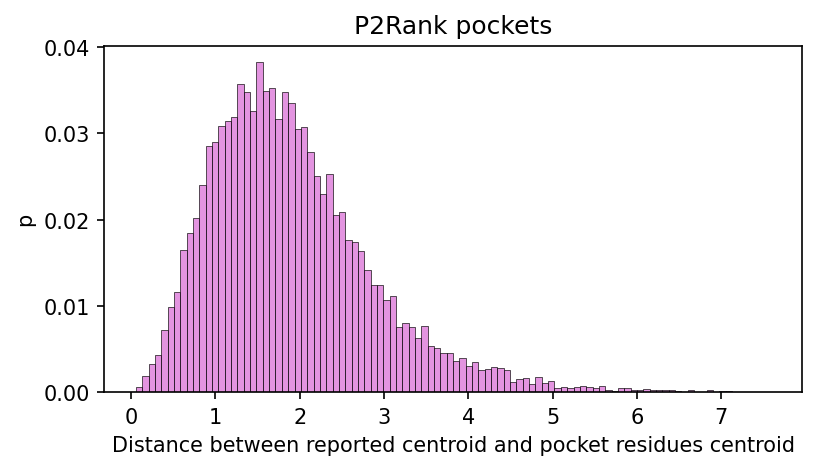

In [63]:
plt.figure(figsize = (6,3), dpi = 150)

sns.histplot(p2rank_pockets_df.distance, bins = 100, stat = "proportion", color = "orchid")
#plt.xlim(-30, 20)
plt.title("P2Rank pockets")
plt.xlabel("Distance between reported centroid and pocket residues centroid")
plt.ylabel("p")
plt.show()

In [43]:
p2rank_pockets_df.query('rep_chain == "1a52_A"')

,rep_chain,ID,RANK,score,prob,n_sas_points,n_surf_atoms,aas,centre,n_aas,RoG,centre_trans
8108,1a52_A,1,1,24.51,0.88,78,48,"[108, 125, 128, 129, 132, 225, 228, 229, 233, ...","(1.2707, -9.8294, -1.6516)",21,8.82,"(0.591, -9.425, -1.076)"


In [38]:
#p2rank_pockets_df.to_pickle("./results/P2RANK_pockets_RoG_V2.pkl")

## Mapping PDB residues to UP residues

In [44]:
up_aas = {}

errors = []

for _, row in p2rank_pockets_df.iterrows():
    b = 0
    rep_chain = row.rep_chain
    site_ress = row.aas
    rank = row["RANK"]
    mapping_dict = read_from_pickle(f'./../DATA/mappings_label_full/{rep_chain}.pkl')
    site_up_aas = []
    for res in site_ress:
        try:
            site_up_aas.append(mapping_dict[str(res)]) # I think there are integers here as it is not working with AltLocs, so none are present
        except:
            errors.append(rep_chain)
            b = 1
            break
    if b ==1:
        continue
    up_aas[(rep_chain, rank)] = site_up_aas

In [45]:
len(up_aas) #16871

14105

In [46]:
len(errors) #138

120

In [47]:
errors = list(set(errors)) # 84 chains have issues with SIFTS mapping, e.g, 1nav_A. For some reason, the last 40 residues lack residue mapping to UniProt, 119 pockets
print(len(errors)) #99

84


In [48]:
save_to_pickle(errors, "./results/P2Rank_CONS_no_sifts_TRANS.pkl")

In [49]:
p2rank_pockets_df_w_sifts = p2rank_pockets_df.query('rep_chain not in @errors').copy().reset_index(drop = True)
p2rank_pockets_df_w_sifts["up_aas"] = p2rank_pockets_df_w_sifts.set_index(['rep_chain', 'RANK']).index.map(up_aas)

In [50]:
p2rank_pockets_df_w_sifts["n_up_aas"] = p2rank_pockets_df_w_sifts['up_aas'].apply(lambda x: len(x))
assert p2rank_pockets_df_w_sifts.n_aas.equals(p2rank_pockets_df_w_sifts.n_up_aas)
p2rank_pockets_df_w_sifts.drop(columns = ["n_up_aas"], inplace = True)

In [51]:
p2rank_pockets_df_w_sifts = p2rank_pockets_df_w_sifts.sort_values(by=["rep_chain", "ID"]).reset_index(drop = True)

In [54]:
p2rank_pockets_df_w_sifts.to_pickle("./results/P2RANK_CONS_pockets_sifted_V2.pkl")

In [52]:
len(p2rank_pockets_df_w_sifts.rep_chain.unique()) #3386

3665

In [2]:
len(set(LIGYSIS_reps).intersection(set(p2rank_pockets_df_w_sifts.rep_chain.unique()))) #2863

NameError: name 'LIGYSIS_reps' is not defined

## Add pocket surfaces and volumes

In [3]:
import importlib
import JSU_lib
importlib.reload(JSU_lib)
from JSU_lib import *

In [4]:
p2rank_pockets_df_w_sifts = pd.read_pickle("./results/P2RANK_CONS_pockets_sifted_V2.pkl")

In [5]:
master_SASA_dict = read_from_pickle("./results/master_SASA_dict.pkl")

In [6]:
p2rank_pockets_df_w_sifts_SASA = calculate_total_sasa(p2rank_pockets_df_w_sifts, master_SASA_dict)

In [7]:
vols_dict = read_from_pickle("./results/P2Rank_CONS_volumes_dict.pkl")

In [8]:
p2rank_pockets_df_w_sifts_SASA["VOL"] = p2rank_pockets_df_w_sifts_SASA.set_index(['rep_chain', 'ID']).index.map(vols_dict)

In [10]:
bad_reps = read_from_pickle("./results/OLD/other_errrors_reps.pkl")

In [11]:
p2rank_pockets_df_w_sifts_SASA.query('VOL != VOL & rep_chain not in @bad_reps')

,rep_chain,ID,RANK,score,prob,n_sas_points,n_surf_atoms,aas,centre,n_aas,RoG,centre_trans,up_aas,SASA,VOL


In [14]:
p2rank_pockets_df_w_sifts_SASA.query('VOL > SASA').

,rep_chain,ID,RANK,score,prob,n_sas_points,n_surf_atoms,aas,centre,n_aas,RoG,centre_trans,up_aas,SASA,VOL
1,1a5h_B,1,1,14.56,0.736,83,49,"[149, 197, 198, 199, 200, 201, 203, 221, 222, ...","(2.6347, 4.4691, -8.0903)",25,9.61,"(2.323, 2.829, -7.111)","[459, 507, 508, 509, 510, 511, 513, 531, 532, ...",823.17,1507.0
7,1aii_A,1,1,2.37,0.062,40,22,"[119, 120, 121, 124, 250, 251, 279, 282, 283, ...","(2.4154, -2.0563, 7.6232)",14,7.61,"(2.596, -0.22, 7.586)","[119, 120, 121, 124, 250, 251, 279, 282, 283, ...",611.73,643.0
8,1aii_A,2,2,2.30,0.058,36,23,"[117, 118, 120, 121, 122, 164, 165, 206, 207, ...","(-0.8619, -8.9589, 8.8216)",10,7.61,"(-2.281, -10.163, 7.093)","[117, 118, 120, 121, 122, 164, 165, 206, 207, ...",408.65,863.0
9,1aii_A,3,3,2.01,0.042,39,23,"[101, 270, 273, 69, 82, 85, 86, 89, 94, 97, 98]","(-5.2377, 10.1955, -5.9293)",11,7.27,"(-4.755, 10.138, -4.328)","[101, 270, 273, 69, 82, 85, 86, 89, 94, 97, 98]",449.58,602.0
12,1aii_A,6,6,1.48,0.020,32,21,"[111, 114, 238, 241, 242, 245, 253, 256, 257]","(4.392, -8.873, -6.6738)",9,6.66,"(3.989, -8.495, -4.906)","[111, 114, 238, 241, 242, 245, 253, 256, 257]",372.67,488.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13875,8x72_A,1,1,23.14,0.870,167,71,"[102, 118, 119, 121, 124, 128, 164, 166, 168, ...","(1.2434, -8.0117, -3.9127)",29,10.09,"(0.44, -7.724, -3.247)","[114, 130, 131, 133, 136, 140, 176, 178, 180, ...",1343.95,2435.0
13877,8x88_B,1,1,5.26,0.258,73,40,"[142, 143, 144, 145, 165, 169, 174, 177, 178, ...","(6.7669, 3.1895, 4.338)",17,8.24,"(7.908, 3.844, 3.841)","[152, 153, 154, 155, 175, 179, 184, 187, 188, ...",762.88,840.0
13878,8xov_A,1,1,15.57,0.760,101,46,"[107, 109, 110, 111, 112, 116, 159, 162, 172, ...","(-2.5311, -10.1511, -0.3272)",23,9.28,"(-2.282, -10.311, -0.336)","[139, 141, 142, 143, 144, 148, 191, 194, 204, ...",1031.85,1317.0
13882,8y6b_F,1,1,7.22,0.415,88,37,"[206, 207, 208, 209, 253, 254, 256, 302, 303, ...","(-0.9131, 20.4898, -2.4302)",23,8.31,"(-1.221, 20.396, -4.647)","[237, 238, 239, 240, 284, 285, 287, 333, 334, ...",516.18,849.0


In [13]:
p2rank_pockets_df_w_sifts_SASA.to_pickle("./results/P2Rank_CONS_pockets_DEF_TRANS.pkl")

In [14]:
for _i, row in combined_SASA_df.iterrows():
    RoG = row.RoG
    rep_chain = row.rep_chain
    aas = row.aas
    ID = row.ID
    if RoG > 19:
        print(f"{rep_chain}_{ID}: {RoG} --> {'+'.join(aas)}")

2obd_A_1: 19.51 --> 11+125+127+129+13+136+138+15+187+191+194+195+197+198+199+20+201+202+205+206+207+208+211+215+228+23+230+232+236+24+26+261+263+265+269+27+270+273+274+277+282+283+284+285+287+292+295+296+30+31+321+323+324+325+329+331+338+340+342+344+346+367+369+371+373+375+380+382+412+413+416+417+418+420+421+422+425+428+429+432+433+436+437+438+440+441+443+446+448+450+455+457+459+461+463+467+468+471+74+82+84


In [16]:
p2rank_pockets_df_w_sifts_SASA_FILT = p2rank_pockets_df_w_sifts_SASA.query('SASA == SASA & VOL == VOL').copy().reset_index(drop = True)

In [18]:
p2rank_pockets_df_w_sifts_SASA_FILT["SVR"] = p2rank_pockets_df_w_sifts_SASA_FILT.SASA/p2rank_pockets_df_w_sifts_SASA_FILT.VOL

In [21]:
p2rank_pockets_df_w_sifts_SASA_FILT.query('n_aas > 10').sort_values(by = "SVR")

,rep_chain,ID,RANK,score,prob,n_sas_points,n_surf_atoms,aas,centre,n_aas,RoG,centre_trans,up_aas,SASA,VOL,SVR
7342,6bh8_A,3,3,7.14,0.408,70,33,"[127, 181, 182, 185, 186, 204, 355, 356, 359, ...","(2.8152, -13.5869, 5.8872)",17,10.20,"(2.009, -14.587, 6.032)","[127, 181, 182, 185, 186, 204, 355, 356, 359, ...",603.55,3545.0,0.170254
3226,3ddu_A,1,1,19.05,0.826,100,57,"[172, 234, 251, 253, 254, 470, 472, 475, 477, ...","(5.3788, -2.4081, 1.9029)",23,10.51,"(6.153, -3.266, 2.601)","[173, 235, 252, 254, 255, 471, 473, 476, 478, ...",726.97,4150.0,0.175173
7648,6en6_D,2,2,9.29,0.543,45,23,"[100, 111, 115, 178, 182, 186, 194, 197, 198, ...","(9.4375, -13.1465, -3.7013)",12,8.59,"(10.448, -12.614, -5.403)","[129, 140, 144, 207, 211, 215, 223, 226, 227, ...",344.22,1921.0,0.179188
5332,4twe_B,1,1,16.18,0.775,117,63,"[200, 201, 248, 251, 255, 256, 371, 381, 419, ...","(2.2906, -3.75, -0.3046)",28,10.94,"(2.822, -3.083, -1.461)","[197, 198, 245, 248, 252, 253, 368, 378, 416, ...",780.80,4132.0,0.188964
5434,4x0q_B,1,1,28.58,0.908,224,103,"[423, 432, 434, 436, 497, 512, 513, 514, 515, ...","(-3.7337, 13.329, -5.8744)",35,12.27,"(-4.303, 12.383, -4.994)","[2241, 2250, 2252, 2254, 2315, 2330, 2331, 233...",1418.36,6970.0,0.203495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4376,4ae8_A,1,1,7.96,0.467,85,44,"[114, 115, 116, 118, 122, 123, 124, 125, 126, ...","(15.0156, 3.7188, 4.5803)",17,7.82,"(10.305, 6.076, 3.248)","[143, 144, 145, 147, 151, 152, 153, 154, 155, ...",981.53,11.0,89.230000
1686,2epv_A,1,1,7.24,0.416,76,29,"[17, 18, 20, 21, 22, 27, 30, 31, 34, 35, 38]","(-1.8097, 3.6145, -3.6294)",11,7.56,"(1.553, 3.669, -0.51)","[812, 813, 815, 816, 817, 822, 825, 826, 829, ...",870.39,4.0,217.597500
1570,2ebt_A,2,2,6.38,0.347,64,29,"[20, 21, 22, 23, 24, 25, 27, 32, 35, 36, 39, 40]","(3.5151, -10.2512, 5.2831)",12,7.61,"(4.025, -13.286, 1.929)","[377, 378, 379, 380, 381, 382, 384, 389, 392, ...",976.57,0.0,inf
6674,5syn_D,1,1,29.87,0.916,157,77,"[121, 122, 123, 148, 149, 152, 178, 179, 183, ...","(-0.4389, 10.0115, -6.205)",29,11.12,"(1.009, 10.04, -3.12)","[121, 122, 123, 148, 149, 152, 178, 179, 183, ...",1375.93,0.0,inf
